In [12]:
# import packages for analysis and modeling
import pandas as pd # data frame operations
import numpy as np # arrays and math functions
from scipy.stats import uniform # for training and test split
import statsmodels.api as sm # statistical model(including regression)
import statsmodels.formula.api as smf # R - like model specification
import matplotlib.pyplot as plt # 2D plotting
import os

In [17]:
dodgers = pd.read_csv(r"E:\MS_studyProcess\UNCC-Study\spring-2020\6100\dodgers.csv")
dodgers[['month','day','day_of_week','opponent','temp','skies','day_night','cap','shirt','fireworks','bobblehead','attend']]

,month,day,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,attend
0,APR,10,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,56000
1,APR,11,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,29729
2,APR,12,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,28328
3,APR,13,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,31601
4,APR,14,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,46549
5,APR,15,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO,38359
6,APR,23,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO,26376
7,APR,24,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO,44014
8,APR,25,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO,26345
9,APR,27,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO,44807


In [18]:
# examine the structure of the data frame
print("\nContents of dodgers data frame ---------------")

# attendance in thousands for plotting 
dodgers['attend_000'] = dodgers['attend']/1000

pd.DataFrame.head(dodgers)
 
# print the first five rows of the data frame
print(pd.DataFrame.head(dodgers)) 


Contents of dodgers data frame ---------------
  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   

  fireworks bobblehead  attend_000  
0        NO         NO      56.000  
1        NO         NO      29.729  
2        NO         NO      28.328  
3       YES         NO      31.601  
4        NO         NO      46.549  


In [26]:
mondays = dodgers[dodgers['day_of_week'] == 'Monday']
tuesdays = dodgers[dodgers['day_of_week'] == 'Tuesday']
wednesdays = dodgers[dodgers['day_of_week'] == 'Wednesday']
thursdays = dodgers[dodgers['day_of_week'] == 'Thursday']
fridays = dodgers[dodgers['day_of_week'] == 'Friday']
saturdays = dodgers[dodgers['day_of_week'] == 'Saturday']
sundays = dodgers[dodgers['day_of_week'] == 'Sunday']


print(mondays['attend_000'].head)

# convert days' attendance into list of vectors for box plot
data = [mondays['attend_000'], tuesdays['attend_000'], 
    wednesdays['attend_000'], thursdays['attend_000'], 
    fridays['attend_000'], saturdays['attend_000'], 
    sundays['attend_000']]

ordered_day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

<bound method NDFrame.head of 6     26.376
12    43.713
18    24.312
26    38.016
30    50.559
40    34.493
46    32.238
49    33.180
55    32.659
58    36.878
68    33.540
78    33.624
Name: attend_000, dtype: float64>
[6     26.376
12    43.713
18    24.312
26    38.016
30    50.559
40    34.493
46    32.238
49    33.180
55    32.659
58    36.878
68    33.540
78    33.624
Name: attend_000, dtype: float64, 0     56.000
7     44.014
13    32.799
19    47.077
27    51.137
31    55.279
41    33.884
47    53.498
50    52.832
56    55.024
59    56.000
69    40.619
79    42.473
Name: attend_000, dtype: float64, 1     29.729
8     26.345
14    33.993
28    25.509
32    43.494
42    53.570
48    39.955
51    36.596
57    37.084
60    40.173
70    50.560
80    34.014
Name: attend_000, dtype: float64, 2     28.328
29    26.773
36    49.006
64    54.621
71    43.309
Name: attend_000, dtype: float64, 3     31.601
9     44.807
15    35.591
20    40.906
23    36.283
33    40.432
37    49.763
43    

In [27]:

print(data)


[6     26.376
12    43.713
18    24.312
26    38.016
30    50.559
40    34.493
46    32.238
49    33.180
55    32.659
58    36.878
68    33.540
78    33.624
Name: attend_000, dtype: float64, 0     56.000
7     44.014
13    32.799
19    47.077
27    51.137
31    55.279
41    33.884
47    53.498
50    52.832
56    55.024
59    56.000
69    40.619
79    42.473
Name: attend_000, dtype: float64, 1     29.729
8     26.345
14    33.993
28    25.509
32    43.494
42    53.570
48    39.955
51    36.596
57    37.084
60    40.173
70    50.560
80    34.014
Name: attend_000, dtype: float64, 2     28.328
29    26.773
36    49.006
64    54.621
71    43.309
Name: attend_000, dtype: float64, 3     31.601
9     44.807
15    35.591
20    40.906
23    36.283
33    40.432
37    49.763
43    43.873
52    43.537
61    39.805
65    37.622
72    40.167
75    37.133
Name: attend_000, dtype: float64, 4     46.549
10    54.242
16    33.735
21    39.383
24    36.561
34    45.210
38    44.217
44    54.014
53    46.5

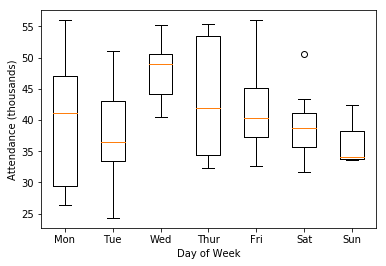

<Figure size 432x288 with 0 Axes>

In [43]:
# exploratory data analysis: box plot for day of the week
fig, axis = plt.subplots()
axis.set_xlabel('Day of Week')
axis.set_ylabel('Attendance (thousands)')
day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_day_names)
plt.show()
plt.savefig(r"E:\MS_studyProcess\UNCC-Study\spring-2020\6100\fig_advert_promo_dodgers_eda_day_of_week_Python.pdf", 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

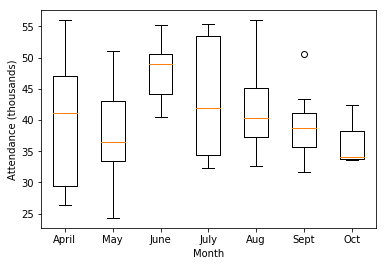

<Figure size 432x288 with 0 Axes>

In [37]:
april = dodgers[dodgers['month'] == 'APR']
may = dodgers[dodgers['month'] == 'MAY']
june = dodgers[dodgers['month'] == 'JUN']
july = dodgers[dodgers['month'] == 'JUL']
august = dodgers[dodgers['month'] == 'AUG']
september = dodgers[dodgers['month'] == 'SEP']
october = dodgers[dodgers['month'] == 'OCT']

data = [april['attend_000'], may['attend_000'], 
    june['attend_000'], july['attend_000'], 
    august['attend_000'], september['attend_000'], 
    october['attend_000']]
ordered_month_names = ['April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct']

fig, axis = plt.subplots()
axis.set_xlabel('Month')
axis.set_ylabel('Attendance (thousands)')
day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_month_names)
plt.show()
plt.savefig(r'E:\MS_studyProcess\UNCC-Study\spring-2020\6100\fig_advert_promo_dodgers_eda_month_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  



In [46]:
# map day_of_week to ordered_day_of_week 
day_to_ordered_day = {'Monday' : '1Monday', 
     'Tuesday' : '2Tuesday', 
     'Wednesday' : '3Wednesday', 
     'Thursday' : '4Thursday', 
     'Friday' : '5Friday',
     'Saturday' : '6Saturday',
     'Sunday' : '7Sunday'}
dodgers['ordered_day_of_week'] = dodgers['day_of_week'].map(day_to_ordered_day)   

# map month to ordered_month
month_to_ordered_month = {'APR' : '1April', 
     'MAY' : '2May', 
     'JUN' : '3June', 
     'JUL' : '4July', 
     'AUG' : '5Aug',
     'SEP' : '6Sept',
     'OCT' : '7Oct'}
dodgers['ordered_month'] = dodgers['month'].map(month_to_ordered_month)

print(dodgers.head)

<bound method NDFrame.head of    month  day  attend day_of_week   opponent  temp   skies day_night  cap  \
0    APR   10   56000     Tuesday    Pirates    67  Clear        Day   NO   
1    APR   11   29729   Wednesday    Pirates    58  Cloudy     Night   NO   
2    APR   12   28328    Thursday    Pirates    57  Cloudy     Night   NO   
3    APR   13   31601      Friday     Padres    54  Cloudy     Night   NO   
4    APR   14   46549    Saturday     Padres    57  Cloudy     Night   NO   
5    APR   15   38359      Sunday     Padres    65  Clear        Day   NO   
6    APR   23   26376      Monday     Braves    60  Cloudy     Night   NO   
7    APR   24   44014     Tuesday     Braves    63  Cloudy     Night   NO   
8    APR   25   26345   Wednesday     Braves    64  Cloudy     Night   NO   
9    APR   27   44807      Friday  Nationals    66  Clear      Night   NO   
10   APR   28   54242    Saturday  Nationals    71  Clear      Night   NO   
11   APR   29   48753      Sunday  Nationals  

In [49]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
dodgers['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(dodgers))
dodgers_train = dodgers[dodgers['runiform'] >= 0.33].copy()
dodgers_test = dodgers[dodgers['runiform'] < 0.33].copy()
# check training data frame
print('\ndodgers_train data frame (rows, columns): ',dodgers_train.shape)
print(dodgers_train.head())
# check test data frame
print('\ndodgers_test data frame (rows, columns): ',dodgers_test.shape)
print(dodgers_test.head())


dodgers_train data frame (rows, columns):  (57, 16)
  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   
7   APR   24   44014     Tuesday   Braves    63  Cloudy     Night  NO    NO   

  fireworks bobblehead  attend_000 ordered_day_of_week ordered_month  runiform  
1        NO         NO      29.729          3Wednesday        1April  0.622109  
2        NO         NO      28.328           4Thursday        1April  0.437728  
3       YES         NO      31.601             5Friday        1April  0.785359  
4        NO         NO      46.549           6Saturday        1April  0.779976  
7        NO         NO      44.014            2Tuesday        1Apri

In [53]:
# specify a simple model with bobblehead entered last
my_model = str('attend ~ ordered_month + ordered_day_of_week + bobblehead')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = dodgers_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
dodgers_train.loc[:,'predict_attend'] = train_model_fit.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     5.864
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           4.70e-06
Time:                        11:03:10   Log-Likelihood:                -566.87
No. Observations:                  57   AIC:                             1162.
Df Residuals:                      43   BIC:                             1190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [54]:
# test set predictions from the model fit to the training set
dodgers_test.loc[:,'predict_attend'] = train_model_fit.predict(dodgers_test)

In [56]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(dodgers_test['attend'].corr(dodgers_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model, data = dodgers).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of Bobblehead Promotion on Attendance: ',\
    round(my_model_fit.params[13],0))


Proportion of Test Set Variance Accounted for:  0.217
                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     6.158
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           2.08e-07
Time:                        11:05:21   Log-Likelihood:                -813.52
No. Observations:                  81   AIC:                             1655.
Df Residuals:                      67   BIC:                             1689.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------